In [2]:
from sklearn.neighbors import KNeighborsClassifier
import cv2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [3]:
def extract_color_histogram(ds, img_path, category):
    row = {'r': None, 'g': None, 'b': None, 'category': category}
    img = cv2.imread(img_path)
    channels = cv2.split(img)
    for i, chan in enumerate(channels):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        peak = np.argmax(hist)
        if i == 0:
            row['b'] = peak
        elif i == 1:
            row['g'] = peak
        else:
            row['r'] = peak
    ds = ds.append(row, ignore_index=True)
    return ds

In [4]:
df_train = pd.DataFrame(columns=['r', 'g', 'b', 'category'])
for color in ['black', 'blue', 'green', 'orange', 'red', 'violet', 'white', 'yellow']:
    for img_name in os.listdir("./training_dataset/"+ color):
        path = "./training_dataset/" + color + "/" + img_name
        df_train = extract_color_histogram(df_train, path, color)

In [5]:
df_train

,r,g,b,category
0,28,29,33,black
1,10,18,13,black
2,4,0,8,black
3,4,7,7,black
4,8,8,8,black
...,...,...,...,...
107,252,234,4,yellow
108,254,242,0,yellow
109,247,224,23,yellow
110,255,255,0,yellow


In [6]:
df_test = pd.DataFrame(columns=['r', 'g', 'b', 'category'])
for color in ['black', 'blue', 'green', 'orange', 'red', 'violet', 'white', 'yellow']:
    for img_name in os.listdir("./test_dataset/"+ color):
        path = "./test_dataset/" + color + "/" + img_name
        df_test = extract_color_histogram(df_test, path, color)

In [7]:
df_test

,r,g,b,category
0,29,29,29,black
1,1,0,0,black
2,0,4,4,black
3,1,1,3,black
4,4,4,4,black
5,0,255,255,blue
6,0,73,255,blue
7,0,199,199,blue
8,16,23,255,blue
9,2,189,207,blue


In [8]:
X_train = df_train.drop('category', axis=1)
y_train = df_train['category']

In [9]:
X_test = df_test.drop('category', axis=1)
y_test = df_test['category']

In [10]:
final_scores = []
for k in range(2,31):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    final_scores.append(sum(scores)/len(scores))

best accuracy score 0.9561264822134387 at k value of 4


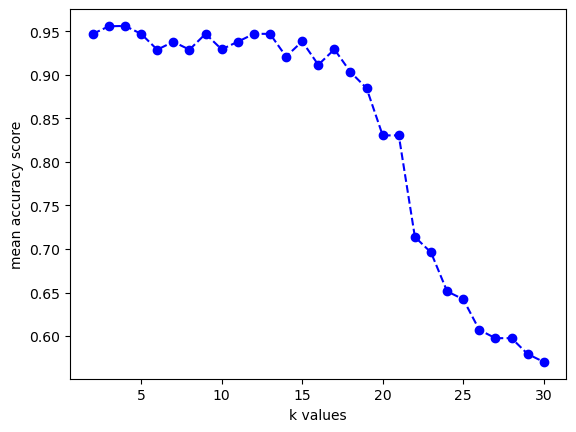

In [11]:
k_vals = [i for i in range(2, 31)]
best_accuracy = max(final_scores)
best_k_val = k_vals[final_scores.index(best_accuracy)]
print(f'best accuracy score {best_accuracy} at k value of {best_k_val}')

plt.plot(k_vals, final_scores, 'bo--')
plt.xlabel('k values')
plt.ylabel('mean accuracy score')
plt.show()

In [12]:
# retrained model with the best k value of 4
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

In [14]:
df_train.to_csv('training.csv', header=False, index=False)